In [1]:
!pip install opencv-python

In [2]:
import cv2

In [3]:
img = cv2.imread('yukta.jpeg')

In [4]:
img.shape

(711, 720, 3)

In [5]:
import matplotlib.pyplot as plt

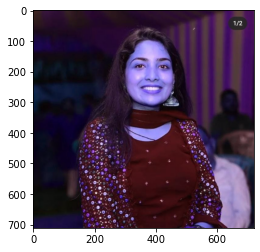

In [6]:
plt.imshow(img)

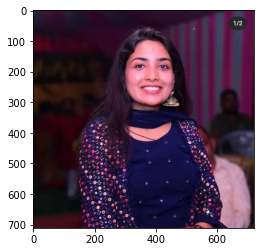

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
haar_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [9]:
haar_data.detectMultiScale(img)

array([[288, 107, 193, 193],
       [561, 467, 131, 131]])

In [10]:
while True:
    faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,255), 4)
    cv2.imshow('result',img)
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [15]:
capture = cv2.VideoCapture(0)
data = []
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,255),4)
            face = img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (50,50))
            print(len(data))
            if len(data)<200:
                data.append(face)
        cv2.imshow('result',img)
        if cv2.waitKey(2) == 27 or len(data)>=200:
            break      
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [11]:
import numpy as np

In [12]:
np.save('without_mask.npy',data)

In [16]:
np.save('with_Mask',data)

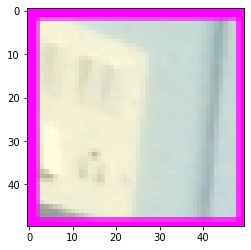

In [17]:
plt.imshow(data[0])

In [18]:
import numpy as np
import cv2

In [19]:
with_mask = np.load('with_mask.npy')
without_mask = np.load('without_mask.npy')

In [20]:
with_mask.shape

(200, 50, 50, 3)

In [21]:
without_mask.shape

(200, 50, 50, 3)

In [22]:
with_mask = with_mask.reshape(200,50*50*3)
without_mask = without_mask.reshape(200, 50*50*3)

In [23]:
with_mask.shape

(200, 7500)

In [24]:
without_mask.shape

(200, 7500)

In [25]:
X = np.r_[with_mask, without_mask]

In [26]:
X.shape

(400, 7500)

In [27]:
labels = np.zeros(X.shape[0])

In [28]:
labels[200:] = 1.0

In [29]:
names = {0 : 'Mask', 1 : 'No Mask'}

In [30]:
#svm - support vector machine
#svc - support vector classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,labels, test_size=0.25)

In [33]:

x_train.shape

(300, 7500)

In [34]:
#PCA - principal component Analysis
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)

In [36]:
x_train[0]

array([3638.87859186,  173.32033557,  924.88154324])

In [37]:
x_train.shape

(300, 3)

In [38]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [39]:
x_test = pca.transform(x_test)
y_pred = svm.predict(x_test)

In [40]:
accuracy_score(y_test, y_pred)

0.98

In [ ]:
haar_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
capture = cv2.VideoCapture(0)
data = []
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 4)
            face = img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (50,50))
            face = face.reshape(1,-1)
            face = pca.transform(face)
            pred = svm.predict(face)[0]
            n = names[int(pred)]
            cv2.putText(img, n, (x,y),font, 1, (244,250,250), 2)
            print(n)
        cv2.imshow('result',img)
        #27 - ASCII of Escape
        if cv2.waitKey(2) == 27:
            break
            
capture.release()
cv2.destroyAllWindows()

No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
Mask